In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Step 1: Define Paths
data_dir_512x512 = "/content/drive/MyDrive/dataset/casting_512x512/casting_512x512"
data_dir_casting = "/content/drive/MyDrive/dataset/casting_data/casting_data"

train_dir = os.path.join(data_dir_casting, "train")
test_dir = os.path.join(data_dir_casting, "test")


In [29]:
print("Contents of casting_512x512:", os.listdir(data_dir_512x512))
print("Contents of train directory:", os.listdir(train_dir))
print("Contents of test directory:", os.listdir(test_dir))

Contents of casting_512x512: ['def_front', 'ok_front']
Contents of train directory: ['ok_front', 'def_front']
Contents of test directory: ['ok_front', 'def_front']


In [30]:
# Step 2: Data Preprocessing
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

Found 6643 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [31]:
# Step 3: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Step 4: Train the Model
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=5,
    callbacks=[early_stopping]
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


208/208 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.5650 - loss: 0.6926 - val_accuracy: 0.6336 - val_loss: 0.6743
Epoch 2/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.5609 - loss: 0.6808 - val_accuracy: 0.7636 - val_loss: 0.5113
Epoch 3/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.7046 - loss: 0.5951 - val_accuracy: 0.7776 - val_loss: 0.5011
Epoch 4/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.8164 - loss: 0.4495 - val_accuracy: 0.7343 - val_loss: 0.5599
Epoch 5/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.8882 - loss: 0.3241 - val_accuracy: 0.5972 - val_loss: 1.0119


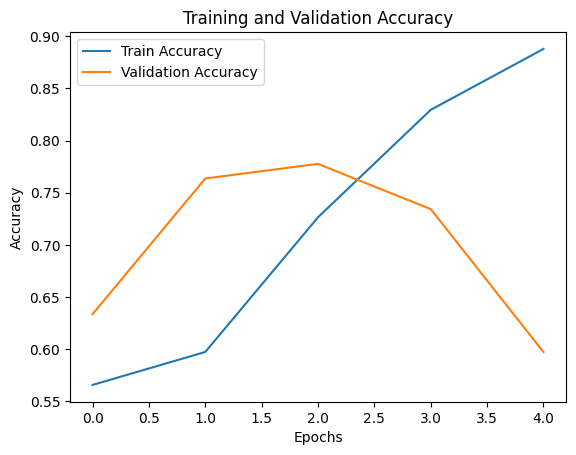

In [33]:
# Step 5: Visualize Training Performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

In [34]:
# Step 6: Evaluate the Model on the Test Set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 419ms/step - accuracy: 0.7980 - loss: 0.4795
Test Accuracy: 77.76%


In [35]:
# Step 7: Save the Model
model.save("defect_detection_model.h5")

In [37]:
# Step 8: Real-Time Inference Example
from tensorflow.keras.preprocessing import image

def predict_defect(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return "Defective" if prediction[0][0] > 0.5 else "Non-Defective"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


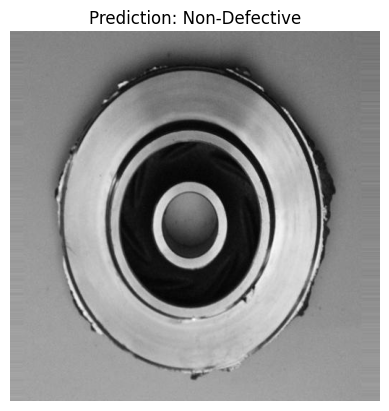

In [39]:
# Step 8: Real-Time Inference Example
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_defect(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return "Defective" if prediction[0][0] > 0.5 else "Non-Defective"


sample_image_path = "/content/drive/MyDrive/dataset/casting_512x512/casting_512x512/def_front/cast_def_0_0.jpeg"
result = predict_defect(sample_image_path)

img = image.load_img(sample_image_path)
plt.imshow(img)
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()

In [42]:
sample_image_path = "/content/drive/MyDrive/dataset/casting_512x512/casting_512x512/def_front/cast_def_0_0.jpeg"
result = predict_defect(sample_image_path)
print(f"Prediction: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: Non-Defective


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction for ok_front/cast_ok_0_1144.jpeg: [[0.7049788]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction for ok_front/cast_ok_0_1155.jpeg: [[0.8442169]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction for def_front/cast_def_0_1147.jpeg: [[0.84372884]]
File not found: /content/drive/MyDrive/dataset/casting_512x512/casting_512x512/def_front/cast_def_0_1238.jpeg


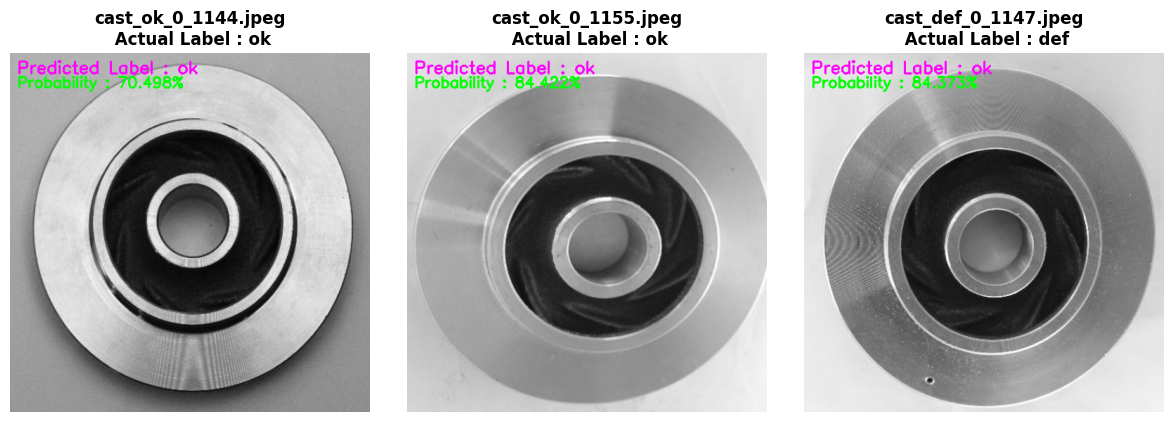

In [77]:
test_cases = [
    'ok_front/cast_ok_0_1144.jpeg', 'ok_front/cast_ok_0_1155.jpeg',
    'def_front/cast_def_0_1147.jpeg', 'def_front/cast_def_0_1238.jpeg',
]

test_path = '/content/drive/MyDrive/dataset/casting_512x512/casting_512x512'
image_shape = (512, 512, 1)

plt.figure(figsize=(20, 8))
for i, case in enumerate(test_cases):
    full_path = os.path.join(test_path, case)
    if not os.path.exists(full_path):
        print(f"File not found: {full_path}")
        continue

    img_pred = cv2.imread(full_path)
    img_pred = cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)
    img_pred = cv2.resize(img_pred, (128, 128))
    img_pred = img_pred / 255.0
    prediction = model.predict(img_pred.reshape(1, 128, 128, 3))
    print(f"Prediction for {case}: {prediction}")


    img = cv2.imread(full_path)
    label = case.split("_")[0]

    plt.subplot(2, 5, i + 1)
    plt.title(f"{case.split('/')[1]}\n Actual Label : {label}", weight='bold', size=12)


    if prediction < 0.5:
        predicted_label = "def"
        prob = (1 - prediction.sum()) * 100
    else:
        predicted_label = "ok"
        prob = prediction.sum() * 100

    cv2.putText(img=img, text=f"Predicted Label : {predicted_label}", org=(10, 30),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.8, color=(255, 0, 255), thickness=2)
    cv2.putText(img=img, text=f"Probability : {'{:.3f}'.format(prob)}%", org=(10, 50),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(0, 255, 0), thickness=2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()